### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')

In [2]:
#Read the CSV file and drop the rows where atleast a column values is NA
vehicle_data = pd.read_csv("vehicle.csv") 
print("Shape before drop", vehicle_data.shape)
vehicle_data.dropna(inplace=True)
print("Shape after drop", vehicle_data.shape)

Shape before drop (846, 19)
Shape after drop (813, 19)


In [3]:
vehicle_data.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car

In [4]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [5]:
#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for cls in vehicle_data.items():
    print(cls[0], cls[1].nunique())
    if(cls[1].nunique() < 10):
        print(cls[1].unique())


Number of unique values of other attributes
compactness 44
circularity 27
distance_circularity 63
radius_ratio 134
pr.axis_aspect_ratio 37
max.length_aspect_ratio 21
scatter_ratio 129
elongatedness 35
pr.axis_rectangularity 13
max.length_rectangularity 66
scaled_variance 126
scaled_variance.1 413
scaled_radius_of_gyration 141
scaled_radius_of_gyration.1 39
skewness_about 23
skewness_about.1 41
skewness_about.2 30
hollows_ratio 31
class 3
['van' 'car' 'bus']


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

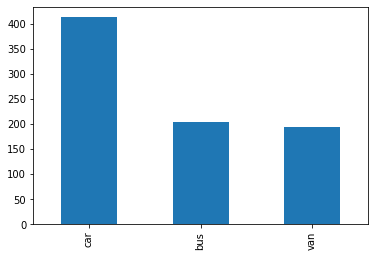

In [6]:
#Get the class column distribution. Though car is 
pd.value_counts(vehicle_data["class"]).plot(kind="bar")
plt.show()

### Check for any missing values in the data 

In [7]:
print("NA values\n", vehicle_data.isna().sum())
print("Null values\n", vehicle_data.isnull().sum())

NA values
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
Null values
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [8]:
from scipy.stats import zscore
vehicle_data_z = vehicle_data.drop("class", axis=1).apply(zscore)
vehicle_data_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

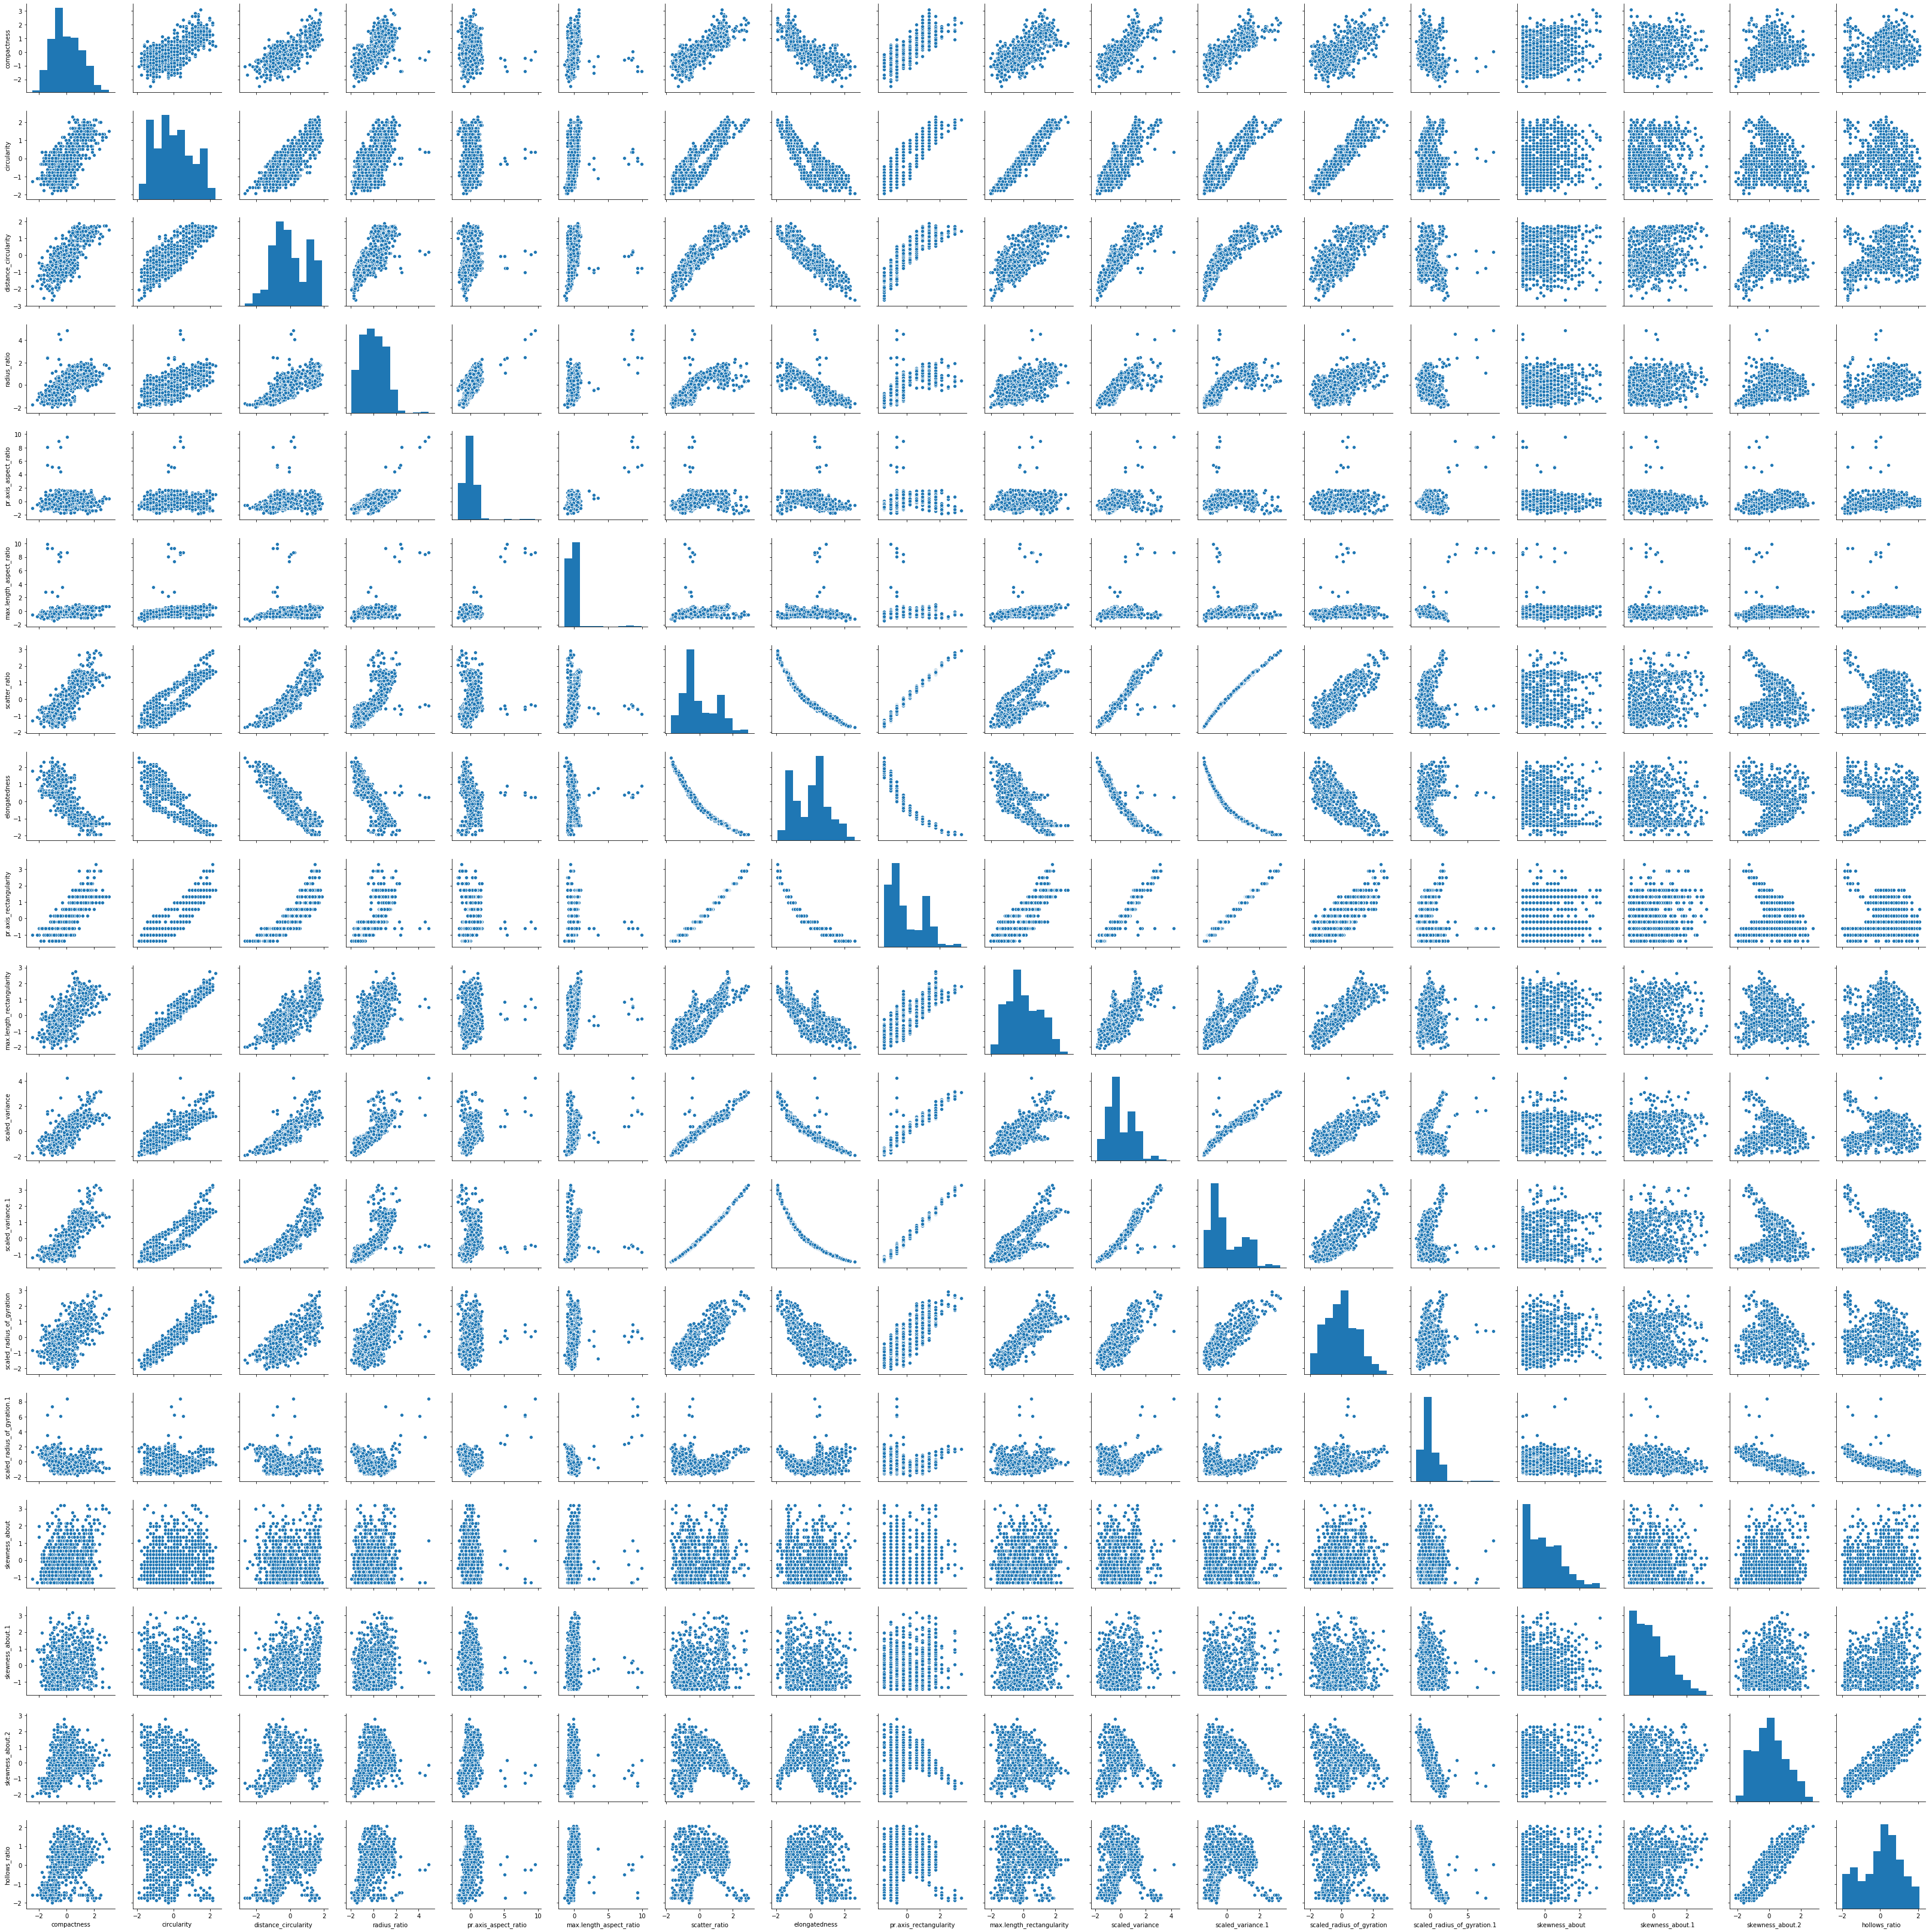

In [9]:
sns.pairplot(vehicle_data_z)
plt.show()

In [10]:
def printHistAndBoxPlot(df, cols, hue):
    for col in cols:
        if(col != hue):   
            f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
            histData = [df[col][df[hue]==cls_name] for cls_name in ["bus", "car", "van"]]
            ax1.hist(histData, histtype='bar', normed=True, stacked=True)
            sns.boxplot(x=hue, y=col, data=df, ax=ax2)
            plt.show() 

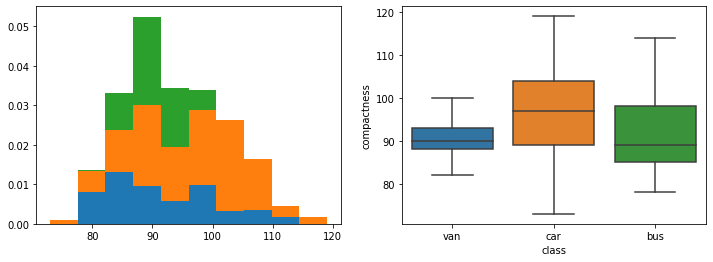

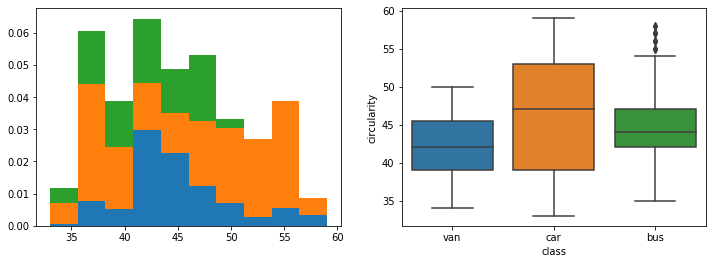

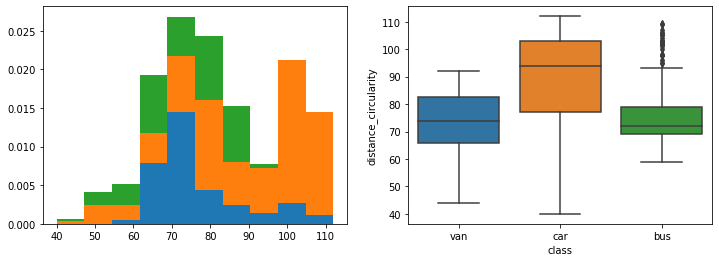

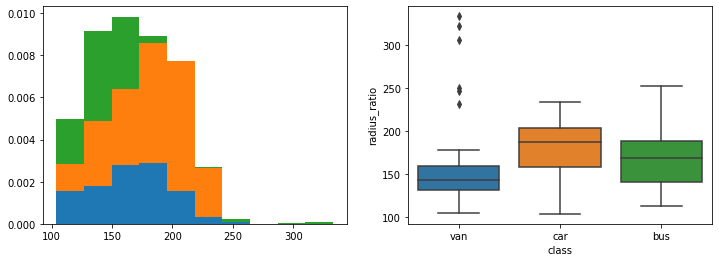

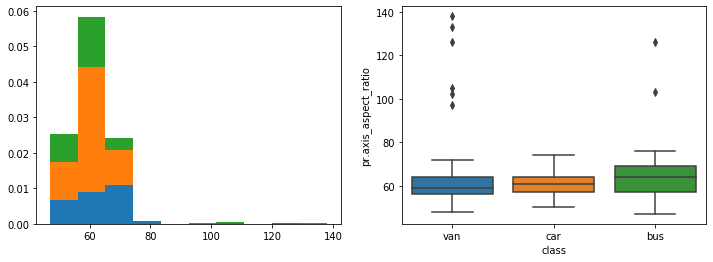

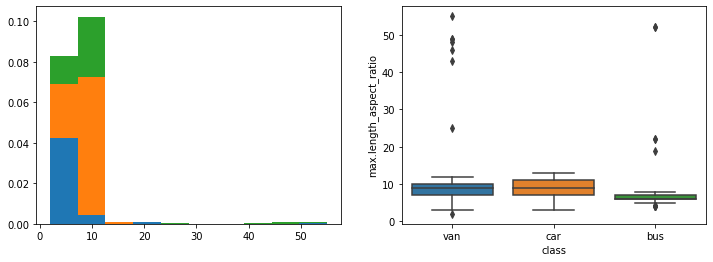

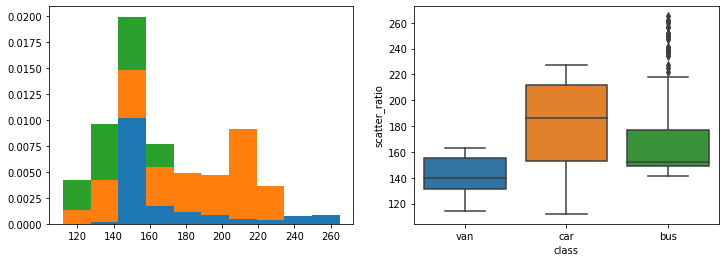

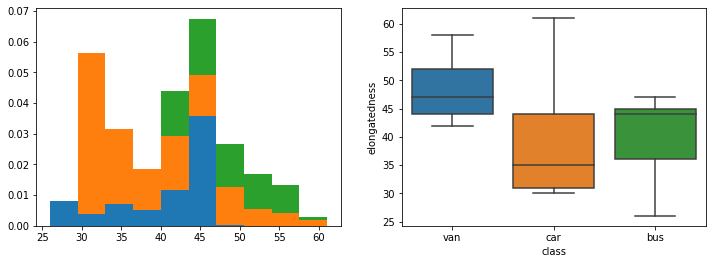

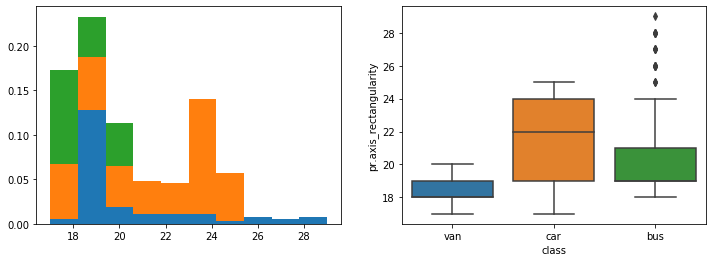

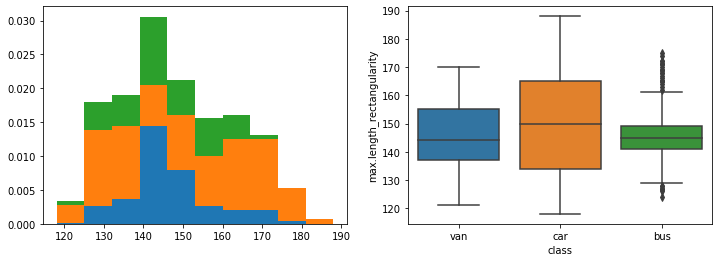

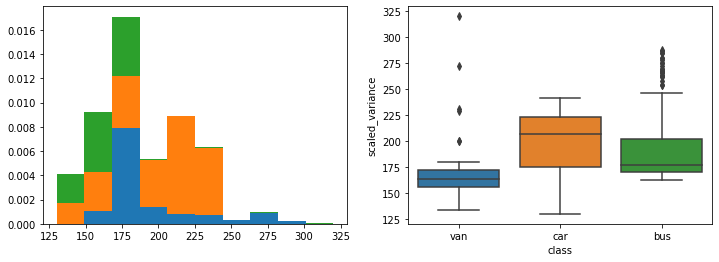

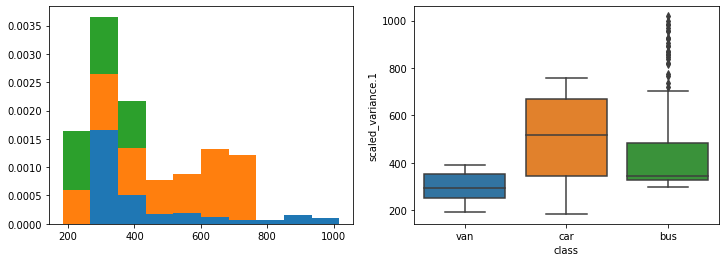

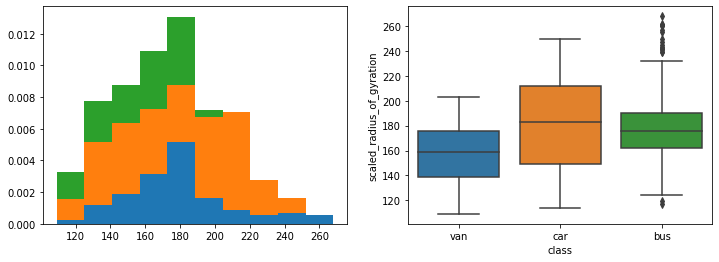

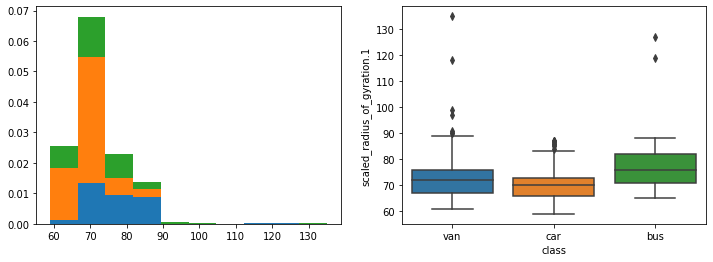

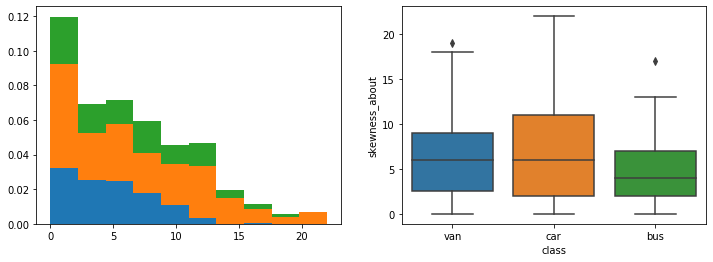

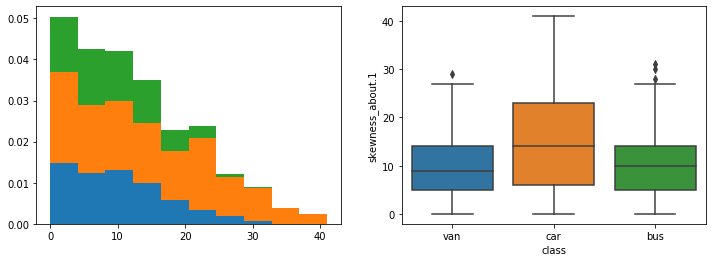

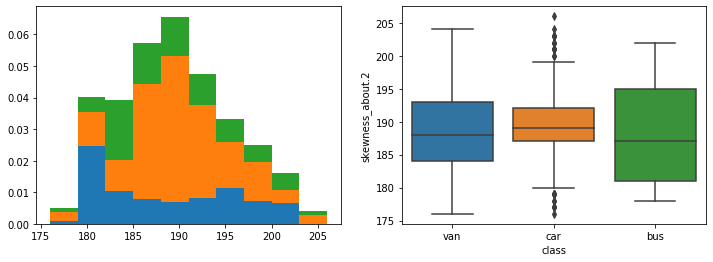

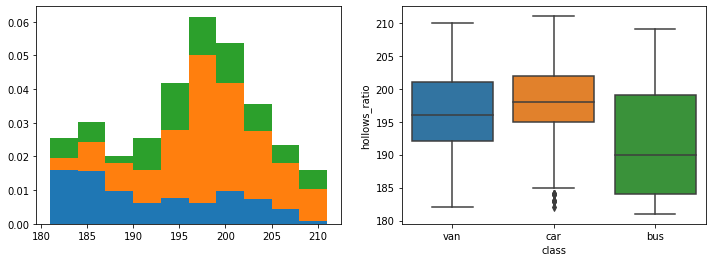

In [11]:
printHistAndBoxPlot(vehicle_data, vehicle_data.columns, "class")

### K - Means Clustering

### Assign a dummy array called Cluster_error

### 5. Calculate errorrs for each K

Iterating values of k from 2 to 10 fit K means model
Using inertia

In [12]:
cluster_error = []
cluster_range = range(2, 10)   
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 10, random_state=5)
  clusters.fit(vehicle_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(vehicle_data_z, labels, metric='euclidean'))

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

In [14]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15] 

num_clusters  cluster_errors  Avg Sil Score
0             2     8623.136976       0.389788
1             3     7037.467395       0.290415
2             4     5739.201327       0.304380
3             5     5191.036236       0.242595
4             6     4707.860902       0.211840
5             7     4350.686420       0.222894
6             8     4089.894296       0.216735
7             9     3848.185382       0.210602

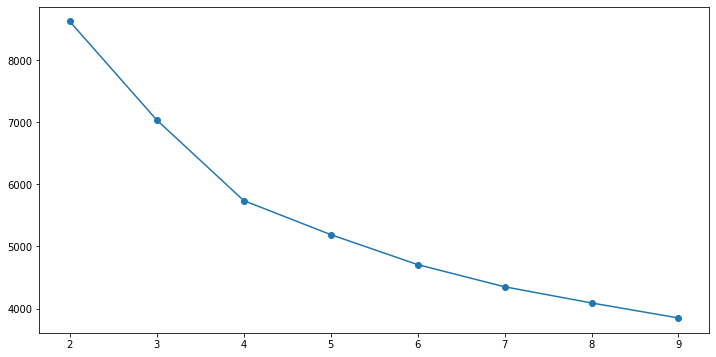

In [15]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

### Find out the optimal value of K

In [16]:
print("Based on the cluster errors - 4 seems to be a resonable K value")

Based on the cluster errors - 4 seems to be a resonable K value


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [17]:
kmeans = KMeans(n_clusters=3, n_init =10, random_state=5)

In [18]:
kmeans.fit(vehicle_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [19]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [20]:
centroid_df = pd.DataFrame(centroids, columns = vehicle_data_z.columns )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.233962    -0.573875             -0.307769     -0.030413   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.919871    -0.520093             -0.893208     -1.064356   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.205073                -0.116532      -0.459042   
1              0.215052                 0.342508       1.271805   
2             -0.500422                -0.219074      -0.779121   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.325063               -0.487988                  -0.536044   
1      -1.190612                1.275484                   1.092668   
2       0.865893               -0.745356                  -0.484632   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.413809          -0.463663                  -0.601550   
1         1.220381           1.281327                   1.079542   
2        -0.782403          -0.783411                  -0.384982   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.619241       -0.061780          0.010668   
1                    -0.028795        0.162290          0.265665   
2                     0.838787       -0.095243         -0.301716   

   skewness_about.2  hollows_ratio  
0          0.812786       0.698973  
1         -0.005356       0.183801  
2         -1.054206      -1.110695

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [21]:
print(len(kmeans.labels_))
print(kmeans.labels_)

813
[0 0 1 0 2 0 0 0 0 0 0 0 0 1 2 0 1 2 2 0 0 1 0 2 1 1 2 0 0 0 1 0 2 1 1 2 1
 2 2 0 1 2 2 2 2 0 2 0 1 0 1 0 0 2 1 2 1 2 2 2 0 2 1 0 1 1 0 2 0 1 0 2 2 1
 0 2 0 1 0 2 0 2 1 0 1 0 2 1 2 2 1 2 2 0 0 2 1 1 2 2 1 0 0 2 2 2 0 1 1 0 2
 2 0 2 2 2 2 2 0 1 1 0 0 2 1 1 2 0 2 0 0 1 2 0 1 0 0 0 0 1 0 0 1 0 1 0 2 0
 2 1 0 0 1 1 0 1 2 2 1 1 0 1 0 0 0 0 2 1 2 0 2 1 0 0 0 1 0 1 0 1 0 2 1 2 2
 2 0 0 1 1 0 0 0 2 1 0 0 0 1 2 2 1 2 0 1 2 2 2 0 1 0 1 2 2 2 2 1 0 2 0 1 2
 0 0 2 1 2 2 0 0 1 2 1 2 0 0 1 0 0 1 1 2 0 0 0 1 2 0 0 2 2 0 0 1 0 2 2 1 0
 0 2 2 1 2 0 1 2 0 1 0 0 1 0 1 2 0 0 1 0 0 0 2 0 1 1 1 1 2 0 1 2 2 2 0 2 1
 1 2 1 0 2 1 0 0 0 1 1 2 1 1 2 1 0 0 0 2 2 1 1 1 0 0 0 1 2 0 2 1 0 0 1 0 1
 1 1 0 2 2 1 2 2 2 0 0 0 0 2 1 1 2 2 1 2 1 2 1 0 2 0 2 1 1 2 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 2 2 0 0 0 2 2 0 2 1 0 0 2 2 1 0 2 0 0 1 0 1 0 1 1 2 2 1 0 2
 2 0 1 1 2 0 1 1 2 1 1 1 0 0 0 0 0 1 2 2 0 1 0 0 1 0 2 1 2 2 1 0 2 1 1 1 2
 1 1 2 0 2 1 1 0 0 2 2 1 0 2 1 1 0 2 1 1 0 2 2 1 1 1 2 2 1 1 1 0 0 1 2 0 1
 0 2 2 0 1 2 0 0 2 0 

In [22]:
vehicle_data["predicted"] = kmeans.labels_

In [23]:
vehicle_data['predicted'].value_counts()

0    313
1    260
2    240
Name: predicted, dtype: int64

In [24]:
vehicle_data['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [25]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [26]:
a.shape

(100, 2)

In [27]:
b.shape

(50, 2)

In [28]:
c.shape

(100, 2)

In [29]:
df1 = pd.DataFrame(a, columns=list('AB'))
df1["target"] = 0
df2 = pd.DataFrame(b, columns=list('AB'))
df2["target"] = 1
df3 = pd.DataFrame(c, columns=list('AB'))
df3["target"] = 2
df = pd.concat([df1,df2,df3])
df.shape
df.sample(10)

A          B  target
91   8.712640  21.618600       2
96   6.958291  16.448655       2
45  11.205272  -2.181280       0
49   9.208590   2.310012       0
65  11.222885  17.799926       2
67   8.927025   2.846236       0
60   8.534400   2.388317       0
99   7.283774   1.814283       0
40   7.693359  -2.281733       0
48   9.855006  16.826803       2

### 10. Use scatter matrix to print all the 3 distributions

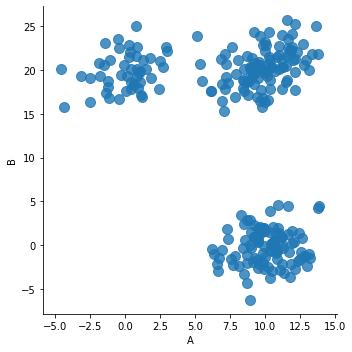

In [30]:
sns.lmplot('A', # Horizontal axis
           'B', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           #hue="target", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size
plt.show()

In [31]:
from scipy.stats import zscore
df_z = df.drop("target", axis=1).apply(zscore)
df_z.head()

A         B
0  1.340744 -0.742754
1  0.835221 -1.055437
2  0.519579 -1.035978
3  0.409292 -1.378463
4  0.145468 -1.598963

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [32]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [33]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(df_z, method='ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(df_z))
print(c)
print(Z)

0.864721309636431
[[1.59000000e+02 2.47000000e+02 7.04832807e-03 2.00000000e+00]
 [6.00000000e+00 3.50000000e+01 7.82142991e-03 2.00000000e+00]
 [1.90000000e+02 2.14000000e+02 8.66729222e-03 2.00000000e+00]
 [6.60000000e+01 7.30000000e+01 1.13813227e-02 2.00000000e+00]
 [1.75000000e+02 2.33000000e+02 1.14011069e-02 2.00000000e+00]
 [2.30000000e+01 9.70000000e+01 1.14936105e-02 2.00000000e+00]
 [1.50000000e+01 5.50000000e+01 1.15601689e-02 2.00000000e+00]
 [1.83000000e+02 2.30000000e+02 1.15756161e-02 2.00000000e+00]
 [5.20000000e+01 9.80000000e+01 1.18562039e-02 2.00000000e+00]
 [1.84000000e+02 1.92000000e+02 1.55447235e-02 2.00000000e+00]
 [8.00000000e+00 1.90000000e+01 1.90779267e-02 2.00000000e+00]
 [1.22000000e+02 1.43000000e+02 2.15202768e-02 2.00000000e+00]
 [2.60000000e+01 2.58000000e+02 2.39421647e-02 3.00000000e+00]
 [0.00000000e+00 9.00000000e+00 2.44227864e-02 2.00000000e+00]
 [1.60000000e+02 2.59000000e+02 2.47784169e-02 3.00000000e+00]
 [1.20000000e+01 4.10000000e+01 2.497

### 12. Plot the dendrogram for the consolidated dataframe

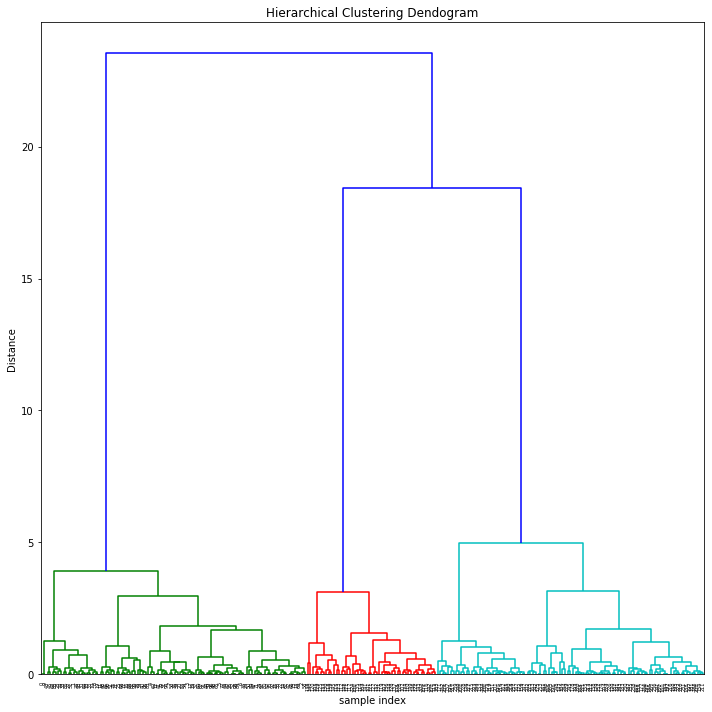

In [35]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

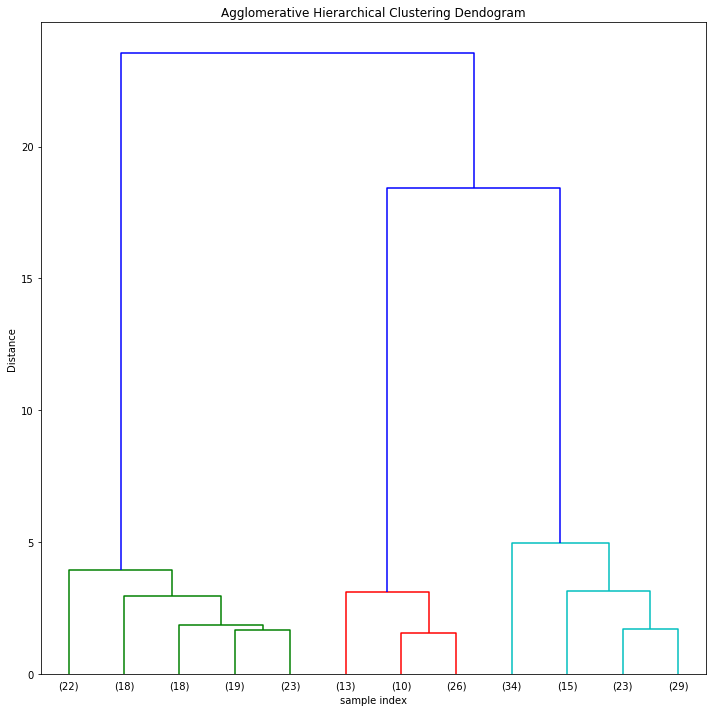

In [36]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0., truncate_mode="lastp", p=12, leaf_font_size=10.)
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [37]:
print("Optimal distance for the clusters where 3 clusters are clearly formed = 9 - 17. So 14 can be used.")

Optimal distance for the clusters where 3 clusters are clearly formed = 9 - 17. So 14 can be used.


https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [38]:
from scipy.cluster.hierarchy import fcluster
#15 is used based on the above Dendogram where 15 cleary 3 cluster which is what we want as labeled target variable
clusters = fcluster(Z, t=14, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [39]:
pd.DataFrame(clusters, columns=["label"])["label"].value_counts()

3    101
1    100
2     49
Name: label, dtype: int64

In [40]:
#alternate method to reach same output using number of clusters - below code can be used.
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [41]:
pd.DataFrame(clusters, columns=["label"])["label"].value_counts()

3    101
1    100
2     49
Name: label, dtype: int64

### Use matplotlib to visually observe the clusters in 2D space 

Model prediction


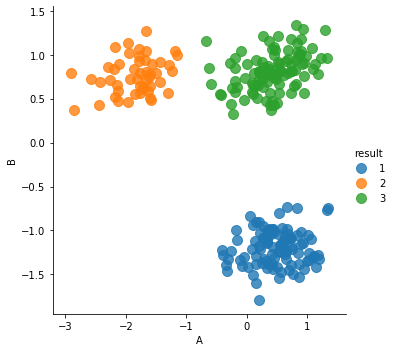

In [42]:
df_z["result"] = clusters
print("Model prediction")
sns.lmplot('A', # Horizontal axis
           'B', # Vertical axis
           data=df_z, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="result", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size
plt.show()

Actual


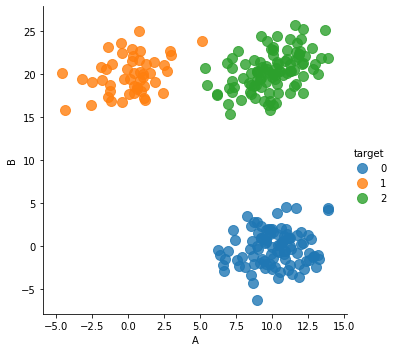

In [43]:
print("Actual")
sns.lmplot('A', # Horizontal axis
           'B', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="target", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.show()

Only one data is getting wrongly classified as seen in the above 2-D comparison between original data and the model prediction